In [23]:
#Import the module and other libraries
import line_detection_updated as ld
import image_rotation as ir
import satmetrics

from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

import numpy as np

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
#Set filepaths
current_user_filepath = 'Data'
img1 = current_user_filepath + '/calexp-0941420_07.fits'
img2 = current_user_filepath + '/calexp-0941422_33.fits'
img3 = current_user_filepath + '/calexp-0941424_34.fits'
img4 = current_user_filepath + '/calexp-0941426_16.fits'
img5 = current_user_filepath + '/calexp-0941424_37.fits'
img6 = current_user_filepath + '/STARLINK-1892-20220305200929.fits'
img7 = current_user_filepath + '/STARLINK-1892-N-20220305200959.fits'
img8 = current_user_filepath + '/STARLINK-1905-20220305191929.fits'
img_multiple_streaks = current_user_filepath + '/bi327715.fits'





In [25]:
#What is the working image?

current_image_filepath = img_multiple_streaks
image_dict = satmetrics.file_ingest(current_image_filepath)
working_image = image_dict['image_list'][0] #Each fits file can have multiple science images. 


08/18/2022 11:24:28 PM Number of detected lines = 9


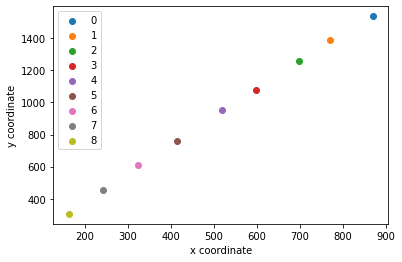

In [26]:
#Get the Hough transformation results
detector = ld.LineDetection(image=working_image.data)
results_ht = detector.hough_transformation()
clustered_lines = ld.cluster(results_ht["Cartesian Coordinates"], results_ht["Lines"], plot_image=True)
nclusters = int(np.max(clustered_lines[:,-1]) + 1)

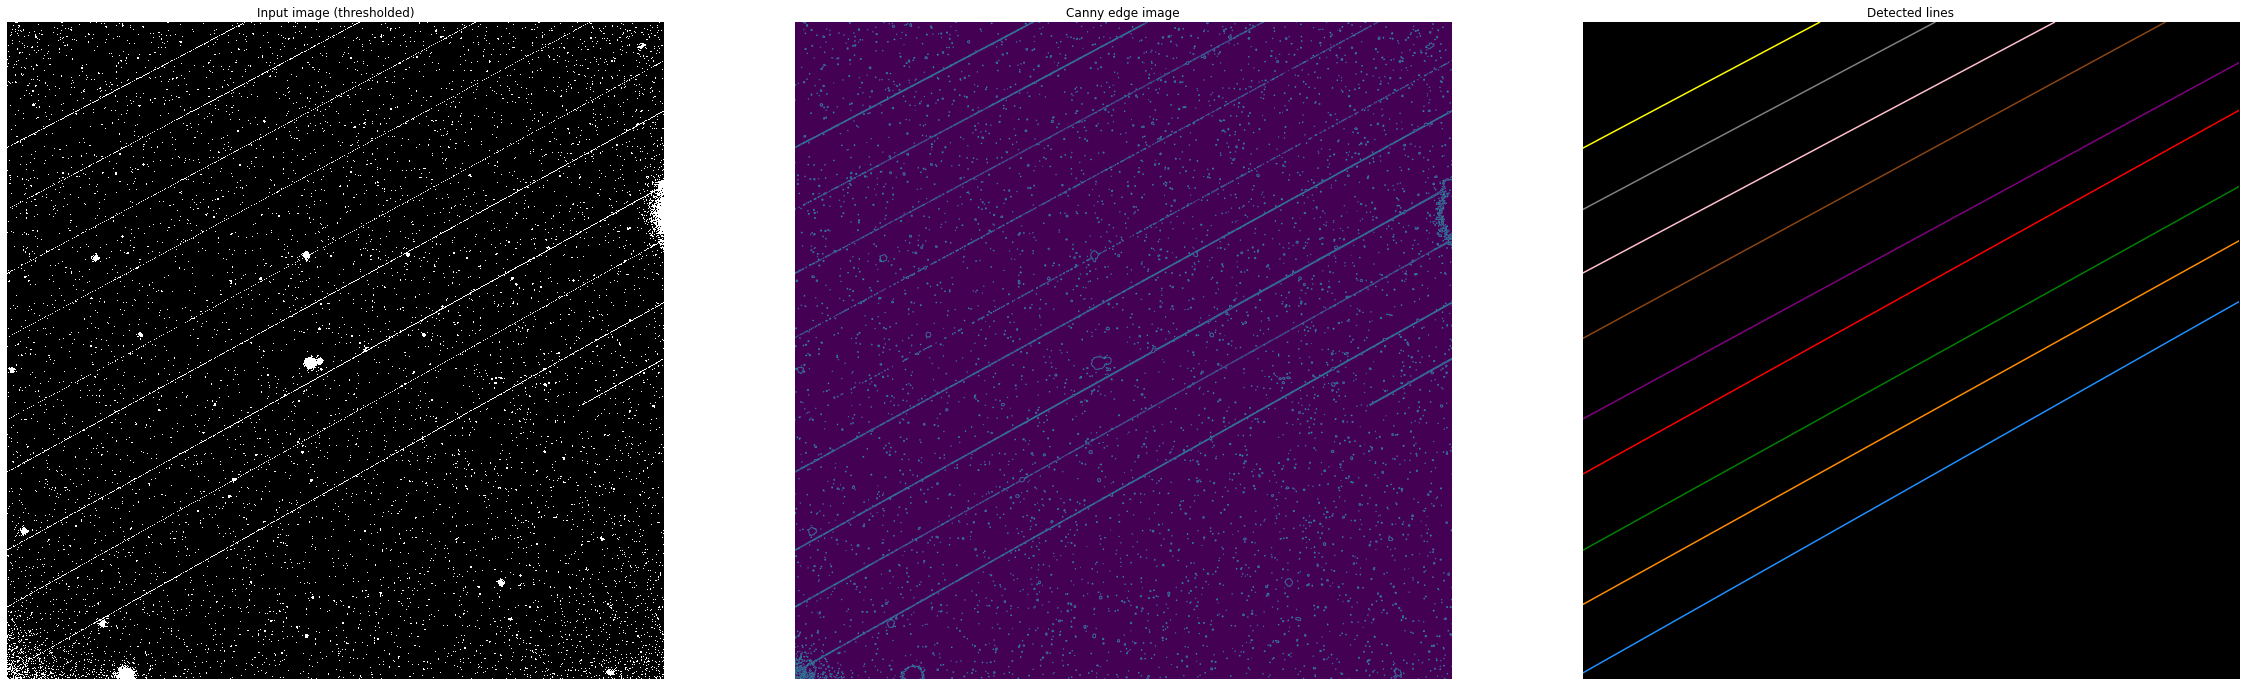

In [27]:
#Plots of line detection
from random import randint
color = ['dodgerblue', 'darkorange', 'green', 'red', 'purple', 'saddlebrown', 'pink', 'gray', 'yellow', 'deepskyblue']
#n = nclusters
#for i in range(n):
#    color.append('#%06X' % randint(0, 0xFFFFFF))

fig, axes = plt.subplots(1, 3, figsize=(40, 40))
ax = axes.ravel()

ld.show(results_ht['Thresholded Image'], cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()
plt.savefig('thresholded_image.png')

ld.show(results_ht["Edges"], ax=ax[1])
ax[1].set_title('Canny edge image')
ax[1].set_axis_off()

#Detected lines
blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap="gray", ax=ax[2])

ax[2].set_axis_off()
ax[2].set_title('Detected lines')

cart_coords = results_ht['Cartesian Coordinates']
angles = results_ht['Angles']
for i in range(len(cart_coords)):
    ax[2].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2), c=color[int(clustered_lines[i,-1])])
